In [14]:
#importing dataset from the excel file
import pandas as pd

df=pd.read_csv(r"C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\clean_dataset_fraud_claims.csv")
df.head(5)

,Month,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,...,WitnessPresent,AgentType,AddressChange_Claim,NumberOfCars,BasePolicy,FraudFound_P,RegistrationDate,RegistrationDate_Year,RegistrationDate_Month,RegistrationDate_Day
0,Jul,Honda,Urban,Sep,Male,Single,Policy Holder,Sedan,96494,400.0,...,No,External,no change,1 vehicle,All Perils,1.0,2023-01-05,2023,1,5
1,Jul,Honda,Rural,Jan,Male,Married,Policy Holder,Sport,89807,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2020-11-09,2020,11,9
2,Jul,Honda,Urban,Aug,Male,Married,Policy Holder,Sedan,25517,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2016-02-24,2016,2,24
3,Nov,Honda,Urban,Jan,Male,Single,Policy Holder,Sport,70903,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2017-04-30,2017,4,30
4,Nov,Toyota,Urban,Jan,Male,Married,Policy Holder,Sedan,28016,400.0,...,No,External,no change,1 vehicle,Collision,1.0,2017-05-21,2017,5,21


In [15]:
# Get unique values from multiple columns
unique_values_dict = {}
for column in df.columns:
    unique_values_dict[column] = df[column].unique()

# Print unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Month': ['Jul' 'Nov' 'Dec' 'Jan' 'Aug' 'Feb' 'Mar' 'Jun' 'Apr' 'May' 'Oct' 'Sep']
Unique values in 'Make': ['Honda' 'Toyota' 'Chevrolet' 'Accura' 'Mazda' 'Pontiac' 'Ford' 'VW'
 'Dodge' 'Nissan' 'Saturn' 'Saab' 'Mercury' 'Mercedes' 'BMW' 'Jaguar'
 'Porsche' 'Ferrari' 'Lexus']
Unique values in 'AccidentArea': ['Urban' 'Rural']
Unique values in 'MonthClaimed': ['Sep' 'Jan' 'Aug' 'Dec' 'May' 'Nov' 'Feb' 'Apr' 'Mar' 'Oct' 'Jul' 'Jun']
Unique values in 'Sex': ['Male' 'Female']
Unique values in 'MaritalStatus': ['Single' 'Married' 'Divorced' 'Widow']
Unique values in 'Fault': ['Policy Holder' 'Third Party']
Unique values in 'VehicleCategory': ['Sedan' 'Sport' 'Utility']
Unique values in 'VehiclePrice': [96494 89807 25517 ... 37556 34145 14796]
Unique values in 'Deductible': [400.         500.         700.         300.         408.46363412
 379.         391.         354.         321.         380.
 310.         333.         311.         320.         322.
 324.         377.    

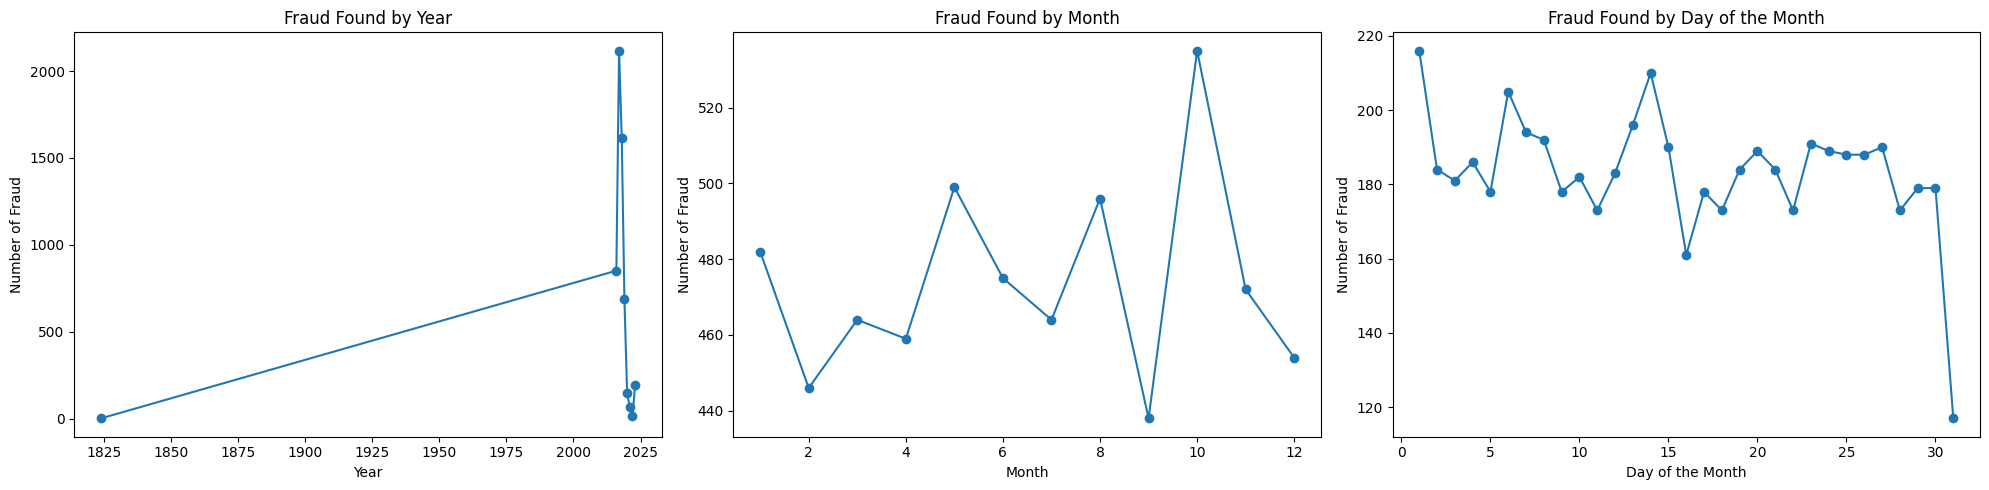

In [16]:
# try plots with year, month and days of the registration date with fraud found

import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert 'RegistrationDate' column to datetime format if it's not already
df['RegistrationDate'] = pd.to_datetime(df['RegistrationDate'])

# Create separate plots for year, month, and day of the month
plt.figure(figsize=(20, 5))

# Plot for year
plt.subplot(1, 3, 1)
df.groupby(df['RegistrationDate'].dt.year)['FraudFound_P'].sum().plot(marker='o')
plt.title('Fraud Found by Year')
plt.xlabel('Year')
plt.ylabel('Number of Fraud')

# Plot for month
plt.subplot(1, 3, 2)
df.groupby(df['RegistrationDate'].dt.month)['FraudFound_P'].sum().plot(marker='o')
plt.title('Fraud Found by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fraud')

# Plot for day of the month
plt.subplot(1, 3, 3)
df.groupby(df['RegistrationDate'].dt.day)['FraudFound_P'].sum().plot(marker='o')
plt.title('Fraud Found by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Fraud')

plt.tight_layout()
plt.show()


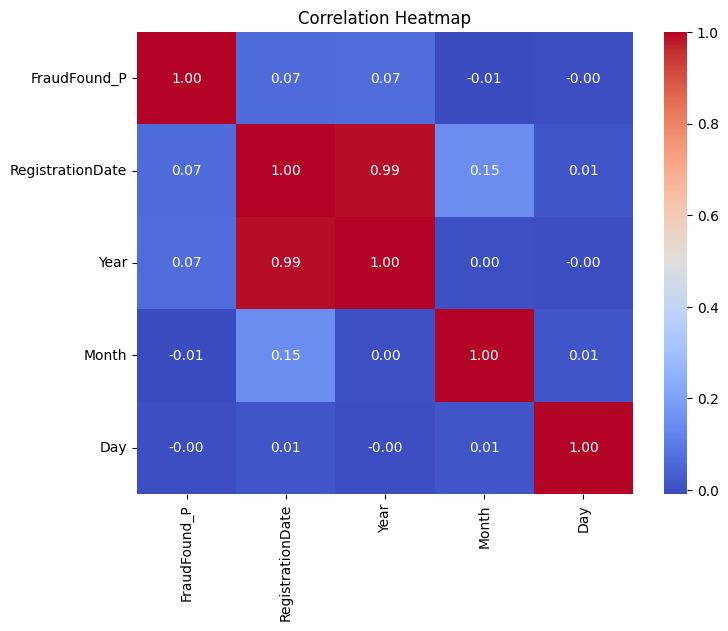

In [17]:
# try heatmap plots with year, month and days of the registration date with fraud found

import seaborn as sns

# Compute correlation matrix
corr = df[['FraudFound_P', 'RegistrationDate']].copy()
corr['Year'] = df['RegistrationDate'].dt.year
corr['Month'] = df['RegistrationDate'].dt.month
corr['Day'] = df['RegistrationDate'].dt.day
corr = corr.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# EDA to undestand the dataset  - Targetted insights
# - All the variables VS FraudFound_P

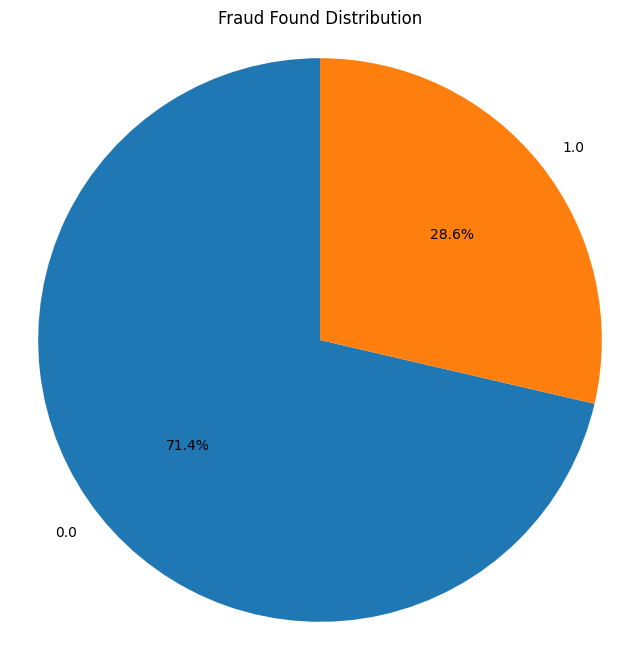

In [18]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Assuming 'FraudFound_P' is the column indicating fraud found

# Count the frequency of fraud found
fraud_counts = df['FraudFound_P'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Fraud Found Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [19]:
# Generating frequency plots of the columns with categorical data

import seaborn as sns
import matplotlib.pyplot as plt
import os


variables_to_plot = ['Month', 'Make', 'AccidentArea', 'MonthClaimed', 'MaritalStatus', 'Fault',
                     'VehicleCategory', 'Days_Policy_Accident', 'Days_Policy_Claim', 
                     'PastNumberOfClaims', 'PoliceReportFiled', 'WitnessPresent', 
                     'AgentType', 'AddressChange_Claim', 'BasePolicy','RegistrationDate']

# Get the current working directory
current_directory = os.getcwd()

# Create a directory to store the plots if it doesn't exist
plots_directory = os.path.join(current_directory, 'plots')
if not os.path.exists(plots_directory):
    os.makedirs(plots_directory)

# Loop through each variable and create a bar plot against the target variable
for column in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Bar Plot of {column} vs Target Variable')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    # Save the plot as a PNG file in the 'plots' directory
    plot_filename = os.path.join(plots_directory, f'{column}_bar_plot.png')
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.close()  # Close the current plot to release memory
    
    print(f'Plot saved as: {plot_filename}')


Plot saved as: C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\plots\Month_bar_plot.png
Plot saved as: C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\plots\Make_bar_plot.png
Plot saved as: C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\plots\AccidentArea_bar_plot.png
Plot saved as: C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\plots\MonthClaimed_bar_plot.png
Plot saved as: C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\plots\MaritalStatus_bar_plot.png
Plot saved as: C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\plots\Fault_bar_plot.png
Plot saved as: C:\Users\Rizwana\Desktop\Accenture - data science program\Fraud claim assignment\Final code\plots\VehicleCategory_bar_plot.png
Plot saved as: C:\Users\Rizwana\Desktop\Accen

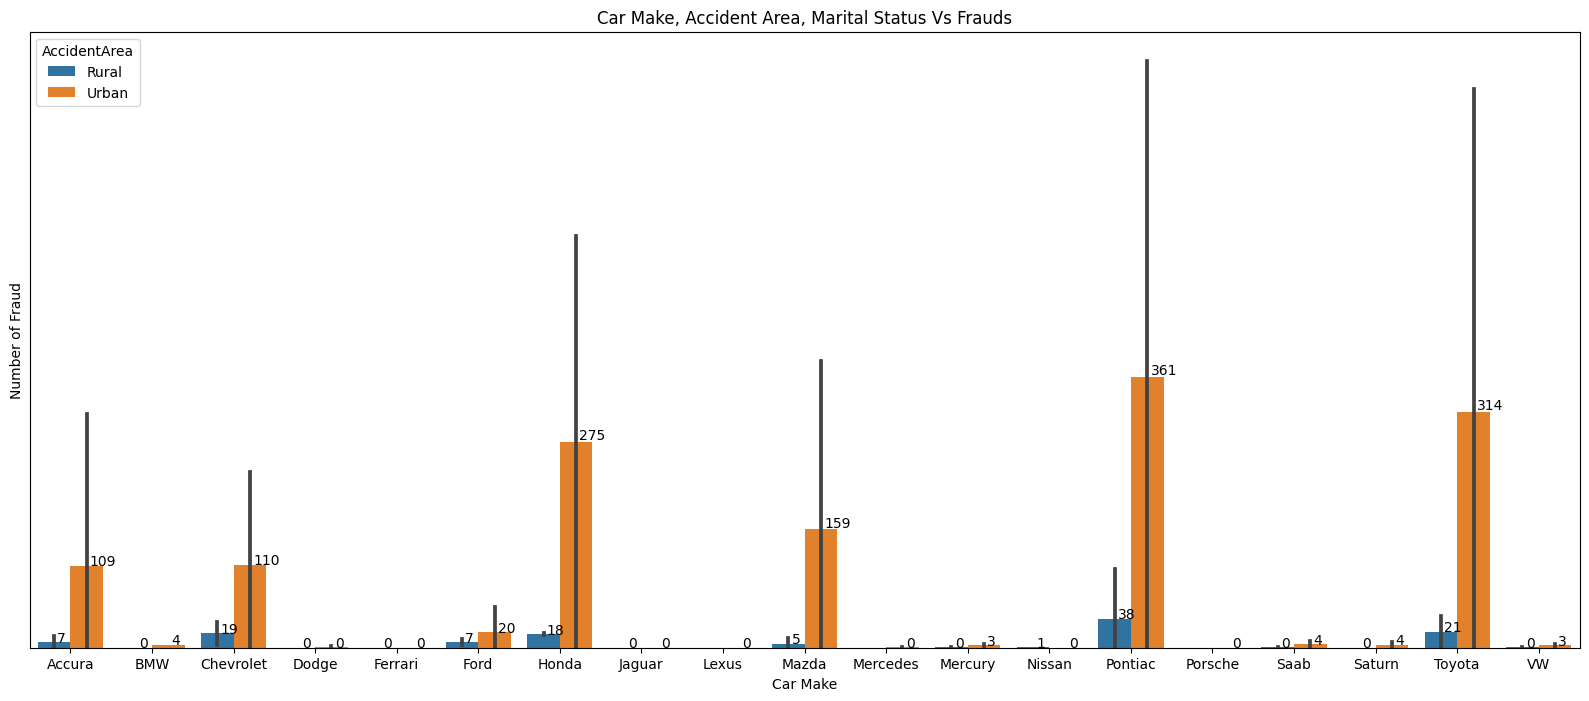

In [20]:
import numpy as np  # Import numpy for NaN handling

# Group the DataFrame and calculate the sum of 'FraudFound_P'
grouped_df = df.groupby(['Make', 'AccidentArea', 'MaritalStatus'])['FraudFound_P'].sum()
grouped_df = grouped_df.reset_index()

plt.figure(figsize=(20, 8))
plt.title("Car Make, Accident Area, Marital Status Vs Frauds")

# Create the bar plot
ax = sns.barplot(x='Make', y='FraudFound_P', hue='AccidentArea', data=grouped_df)

# Annotate each bar with its value (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    # Check if the height value is NaN
    if not np.isnan(height):
        ax.annotate(str(format(int(height), ',')), (p.get_x() + 0.24, height * 1.01))

plt.xlabel("Car Make")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()


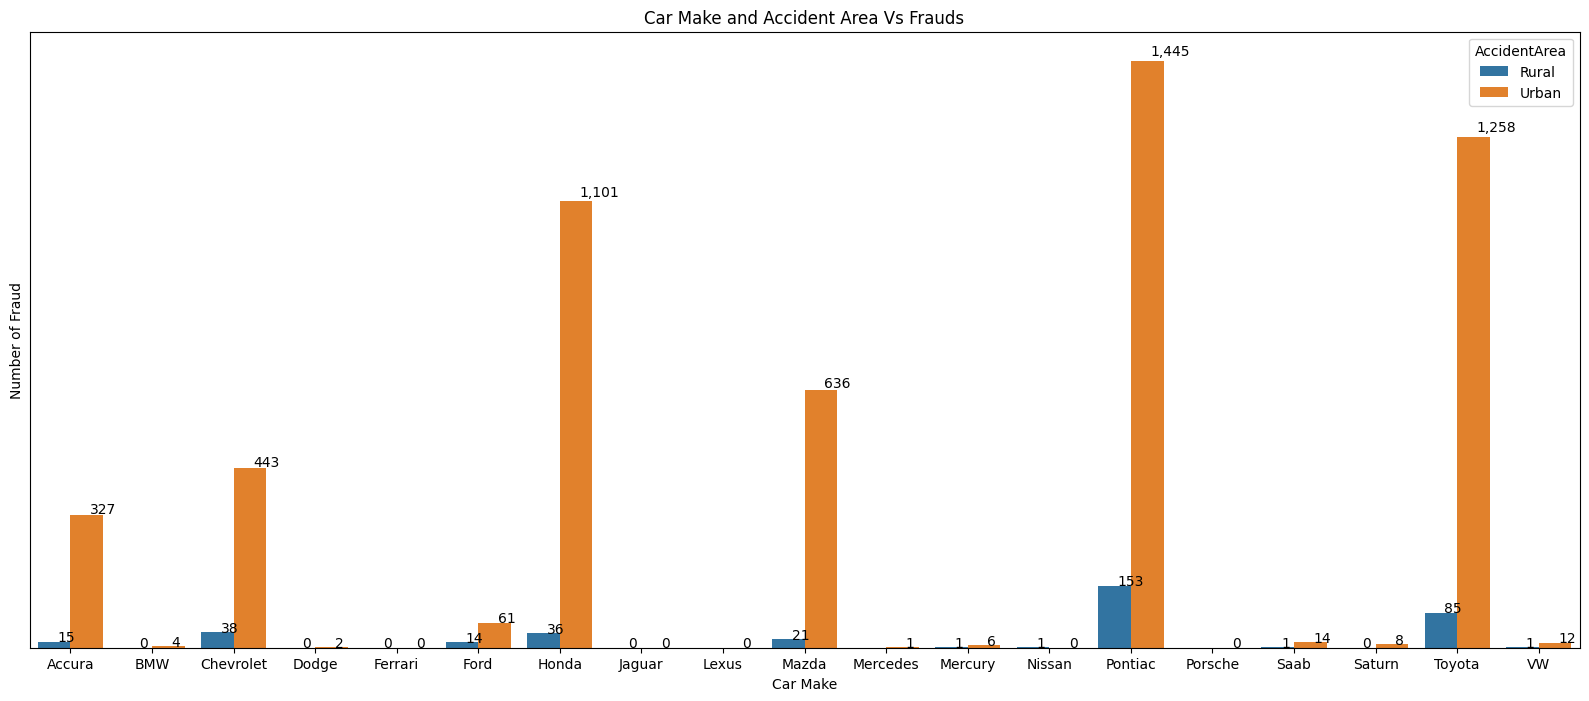

In [21]:
import numpy as np  # Import numpy for NaN handling

# Group the DataFrame and calculate the sum of 'FraudFound_P'
grouped_df = df.groupby(['Make', 'AccidentArea'])['FraudFound_P'].sum()
grouped_df = grouped_df.reset_index()

plt.figure(figsize=(20, 8))
plt.title("Car Make and Accident Area Vs Frauds")

# Create the bar plot
ax = sns.barplot(x='Make', y='FraudFound_P', hue='AccidentArea', data=grouped_df)

# Annotate each bar with its value (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    # Check if the height value is NaN
    if not np.isnan(height):
        ax.annotate(str(format(int(height), ',')), (p.get_x() + 0.24, height * 1.01))

plt.xlabel("Car Make")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()


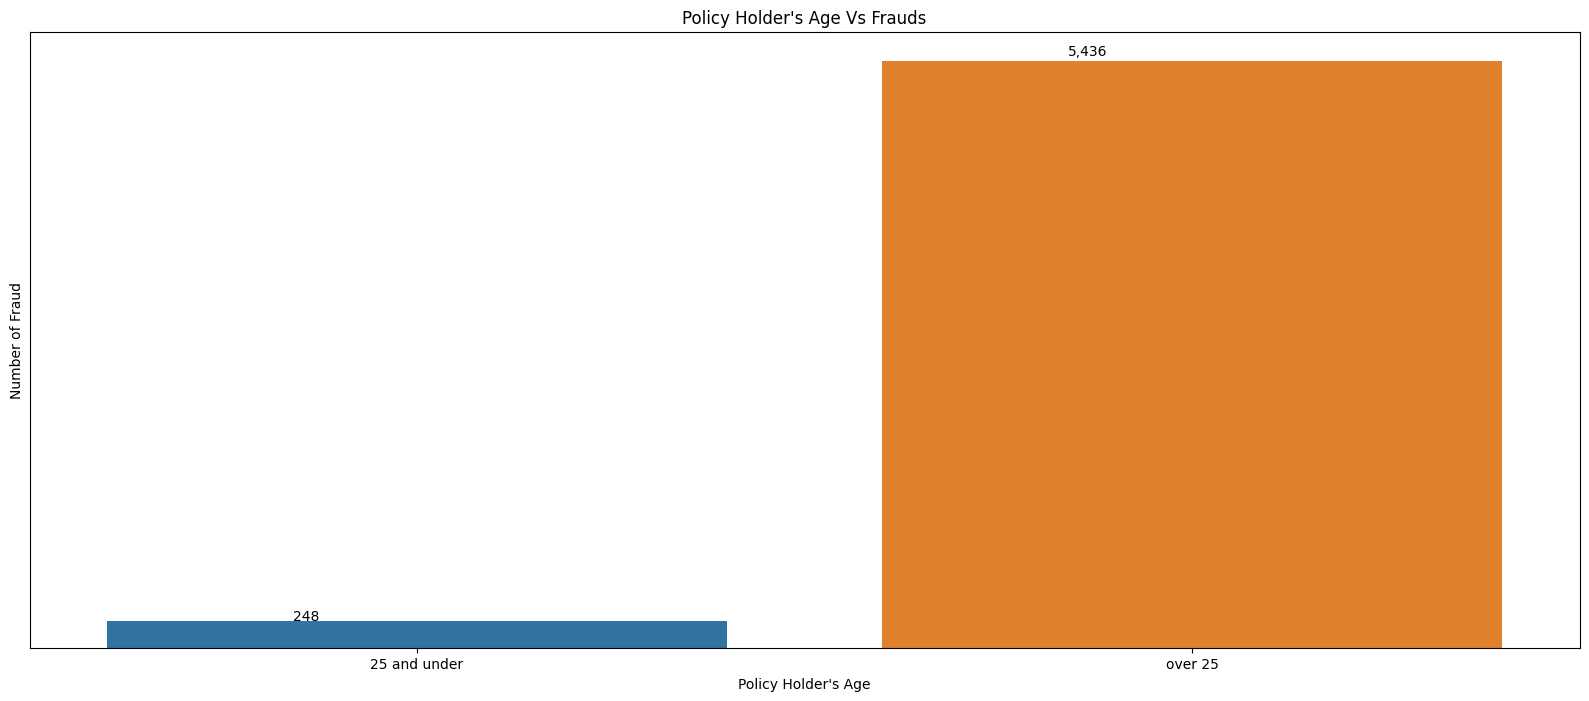

In [22]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound_P'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

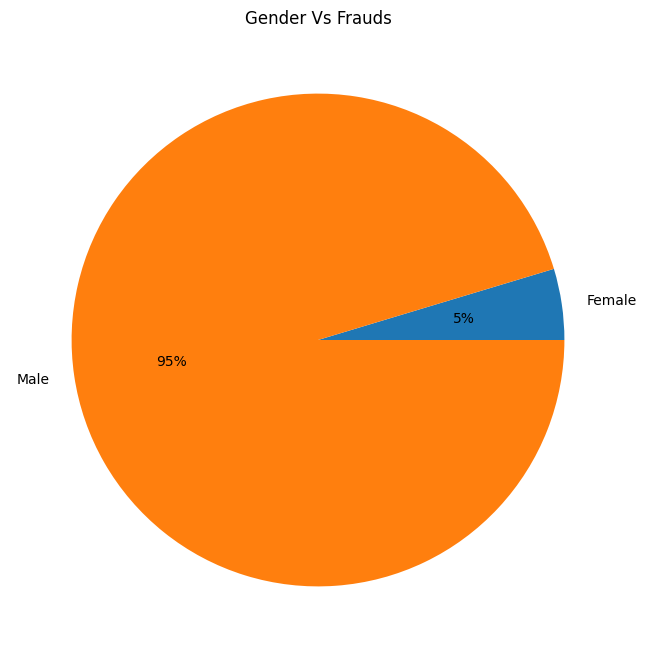

In [23]:
gender = df.groupby('Sex')['FraudFound_P'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()

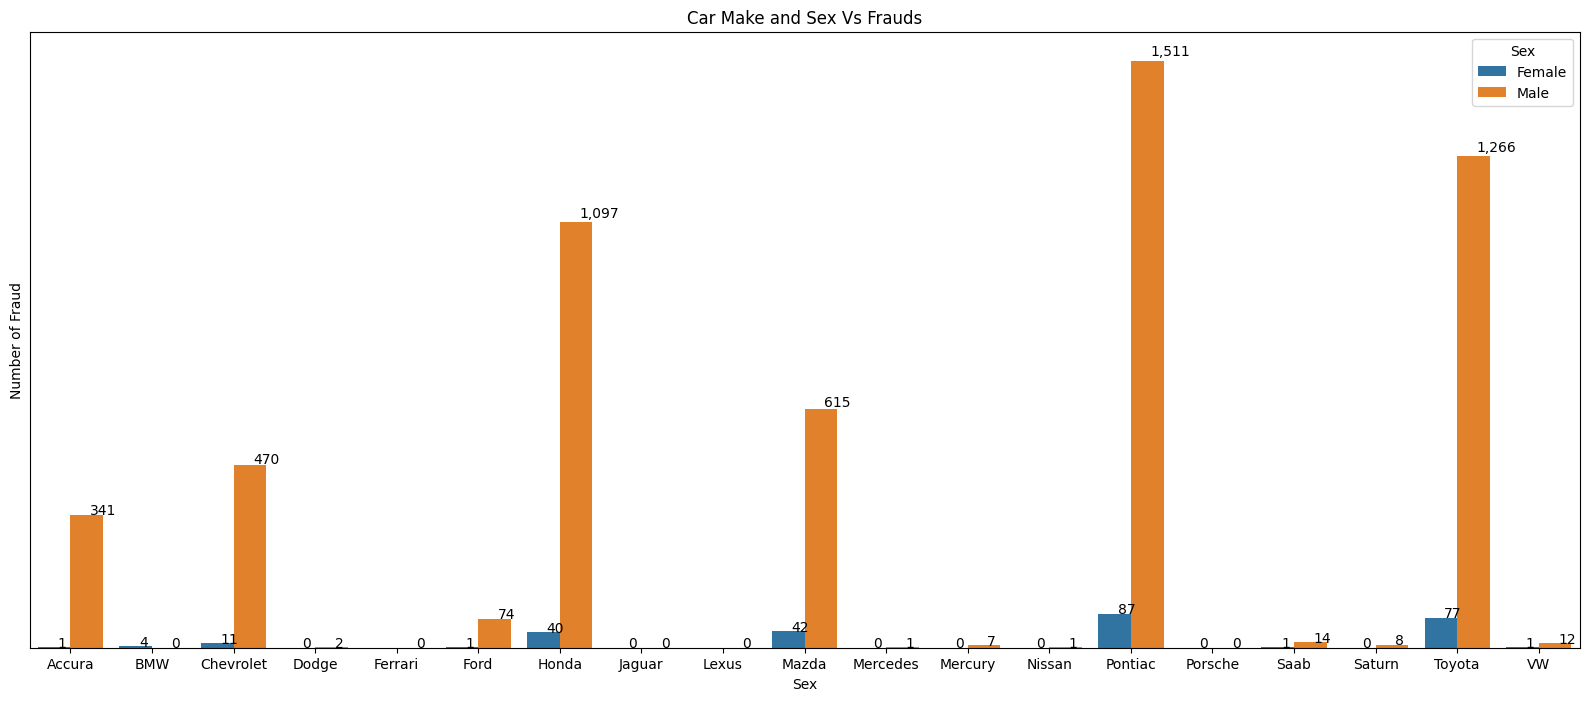

In [24]:
import numpy as np  # Import numpy for NaN handling

# Group the DataFrame and calculate the sum of 'FraudFound_P'
grouped_df = df.groupby(['Make', 'Sex'])['FraudFound_P'].sum()
grouped_df = grouped_df.reset_index()

plt.figure(figsize=(20, 8))
plt.title("Car Make and Sex Vs Frauds")

# Create the bar plot
ax = sns.barplot(x='Make', y='FraudFound_P', hue='Sex', data=grouped_df)

# Annotate each bar with its value (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    # Check if the height value is NaN
    if not np.isnan(height):
        ax.annotate(str(format(int(height), ',')), (p.get_x() + 0.24, height * 1.01))

plt.xlabel("Sex")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()


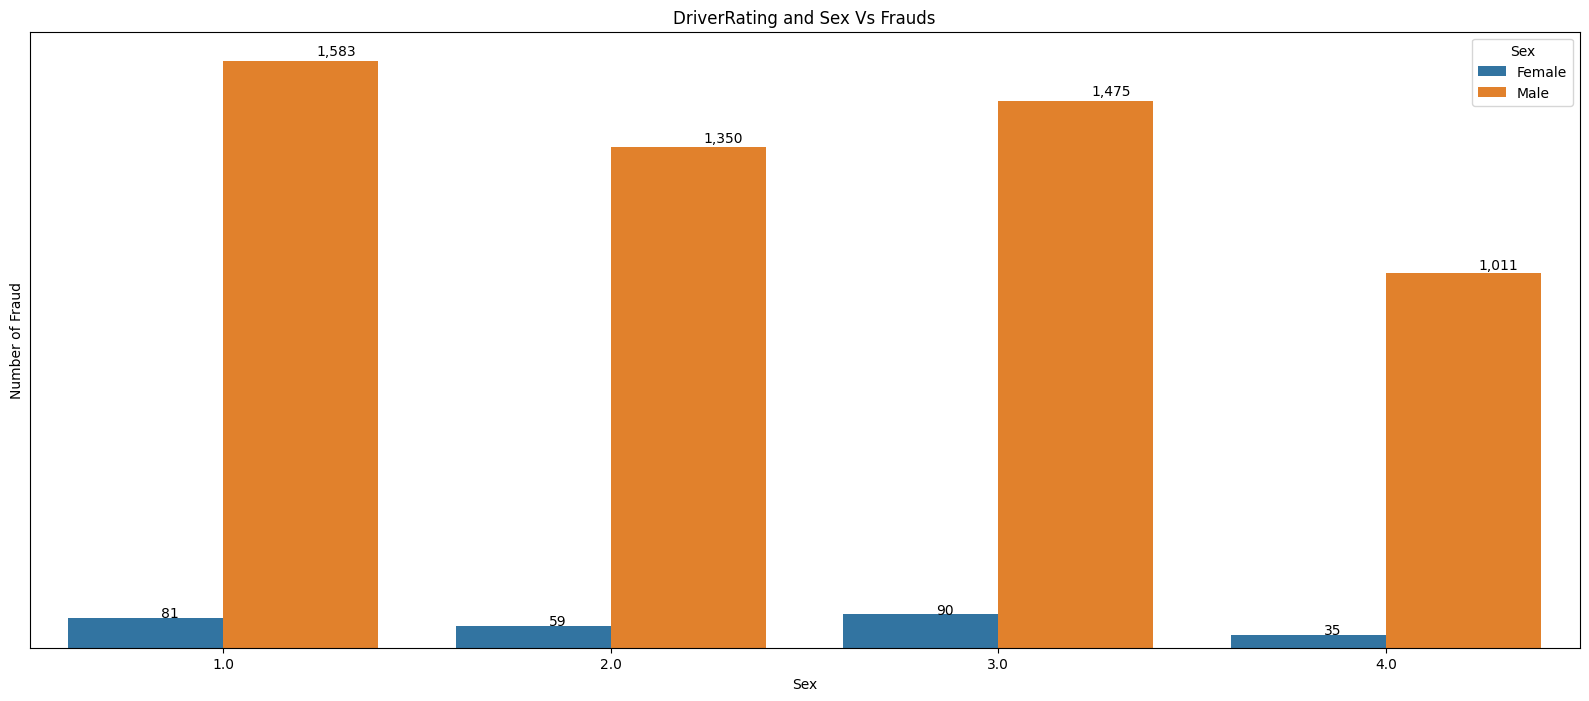

In [25]:
import numpy as np  # Import numpy for NaN handling

# Group the DataFrame and calculate the sum of 'FraudFound_P'
grouped_df = df.groupby(['DriverRating', 'Sex'])['FraudFound_P'].sum()
grouped_df = grouped_df.reset_index()

plt.figure(figsize=(20, 8))
plt.title("DriverRating and Sex Vs Frauds")

# Create the bar plot
ax = sns.barplot(x='DriverRating', y='FraudFound_P', hue='Sex', data=grouped_df)

# Annotate each bar with its value (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    # Check if the height value is NaN
    if not np.isnan(height):
        ax.annotate(str(format(int(height), ',')), (p.get_x() + 0.24, height * 1.01))

plt.xlabel("Sex")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()


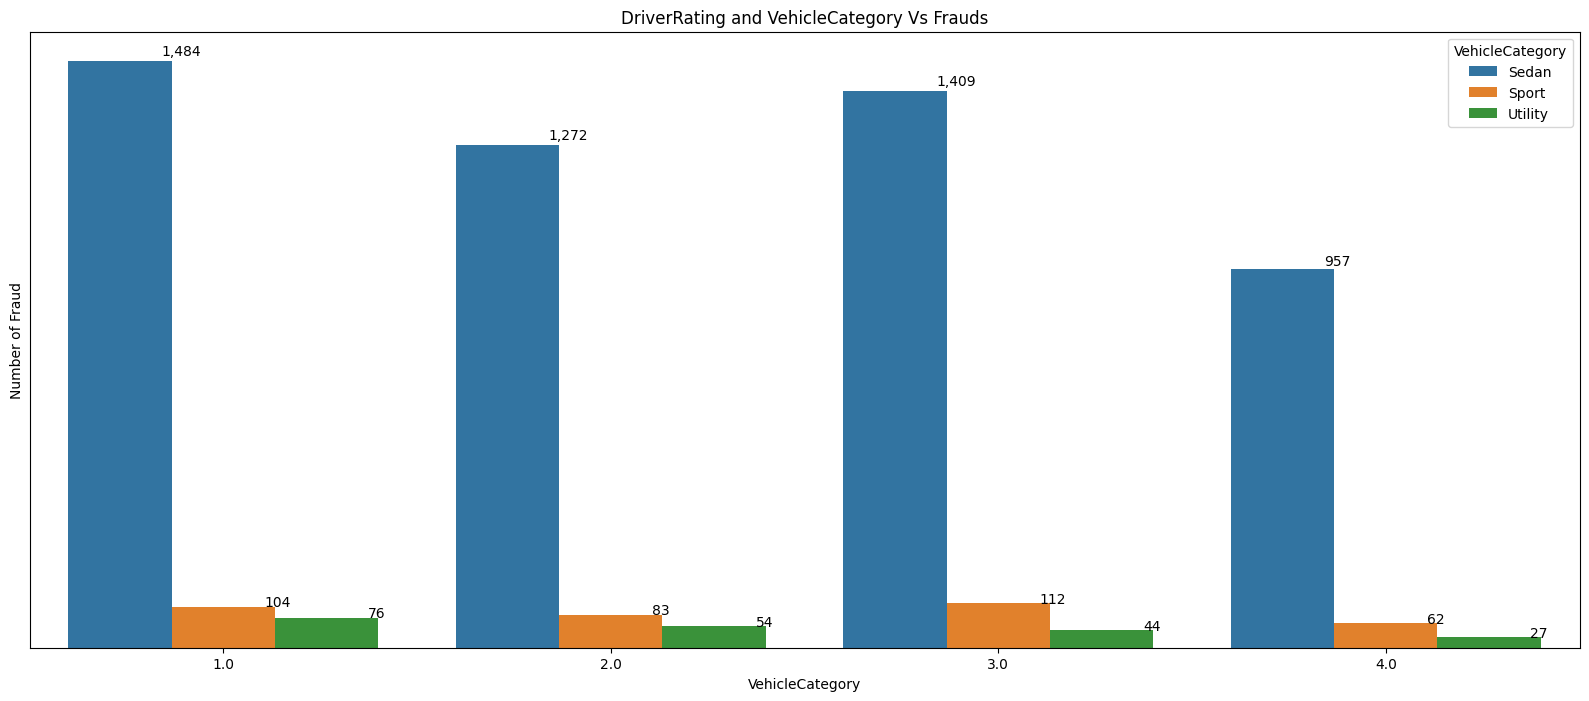

In [26]:
import numpy as np  # Import numpy for NaN handling

# Group the DataFrame and calculate the sum of 'FraudFound_P'
grouped_df = df.groupby(['DriverRating', 'VehicleCategory'])['FraudFound_P'].sum()
grouped_df = grouped_df.reset_index()

plt.figure(figsize=(20, 8))
plt.title("DriverRating and VehicleCategory Vs Frauds")

# Create the bar plot
ax = sns.barplot(x='DriverRating', y='FraudFound_P', hue='VehicleCategory', data=grouped_df)

# Annotate each bar with its value (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    # Check if the height value is NaN
    if not np.isnan(height):
        ax.annotate(str(format(int(height), ',')), (p.get_x() + 0.24, height * 1.01))

plt.xlabel("VehicleCategory")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()


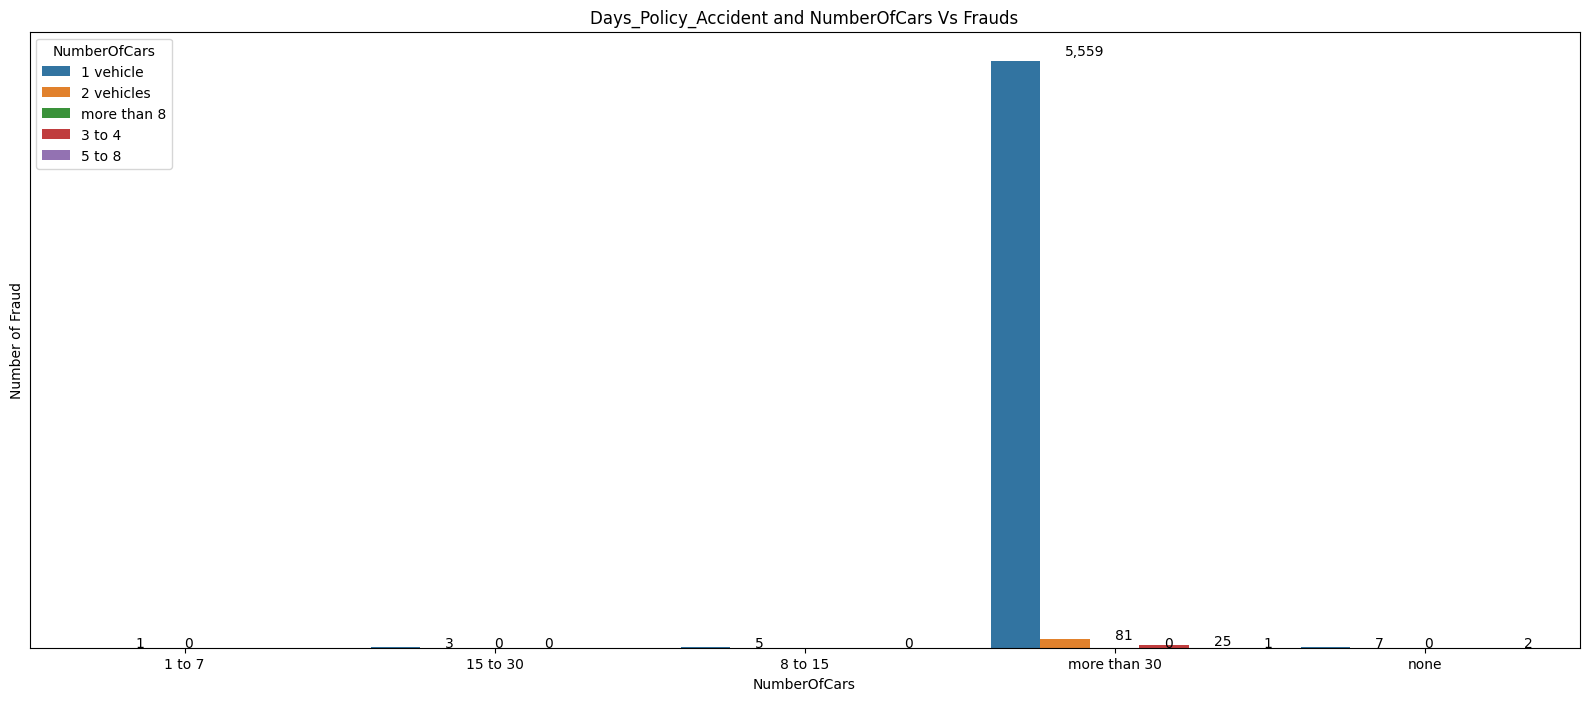

In [27]:
import numpy as np  # Import numpy for NaN handling

# Group the DataFrame and calculate the sum of 'FraudFound_P'
grouped_df = df.groupby(['Days_Policy_Accident', 'NumberOfCars'])['FraudFound_P'].sum()
grouped_df = grouped_df.reset_index()

plt.figure(figsize=(20, 8))
plt.title("Days_Policy_Accident and NumberOfCars Vs Frauds")

# Create the bar plot
ax = sns.barplot(x='Days_Policy_Accident', y='FraudFound_P', hue='NumberOfCars', data=grouped_df)

# Annotate each bar with its value (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    # Check if the height value is NaN
    if not np.isnan(height):
        ax.annotate(str(format(int(height), ',')), (p.get_x() + 0.24, height * 1.01))

plt.xlabel("NumberOfCars")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()


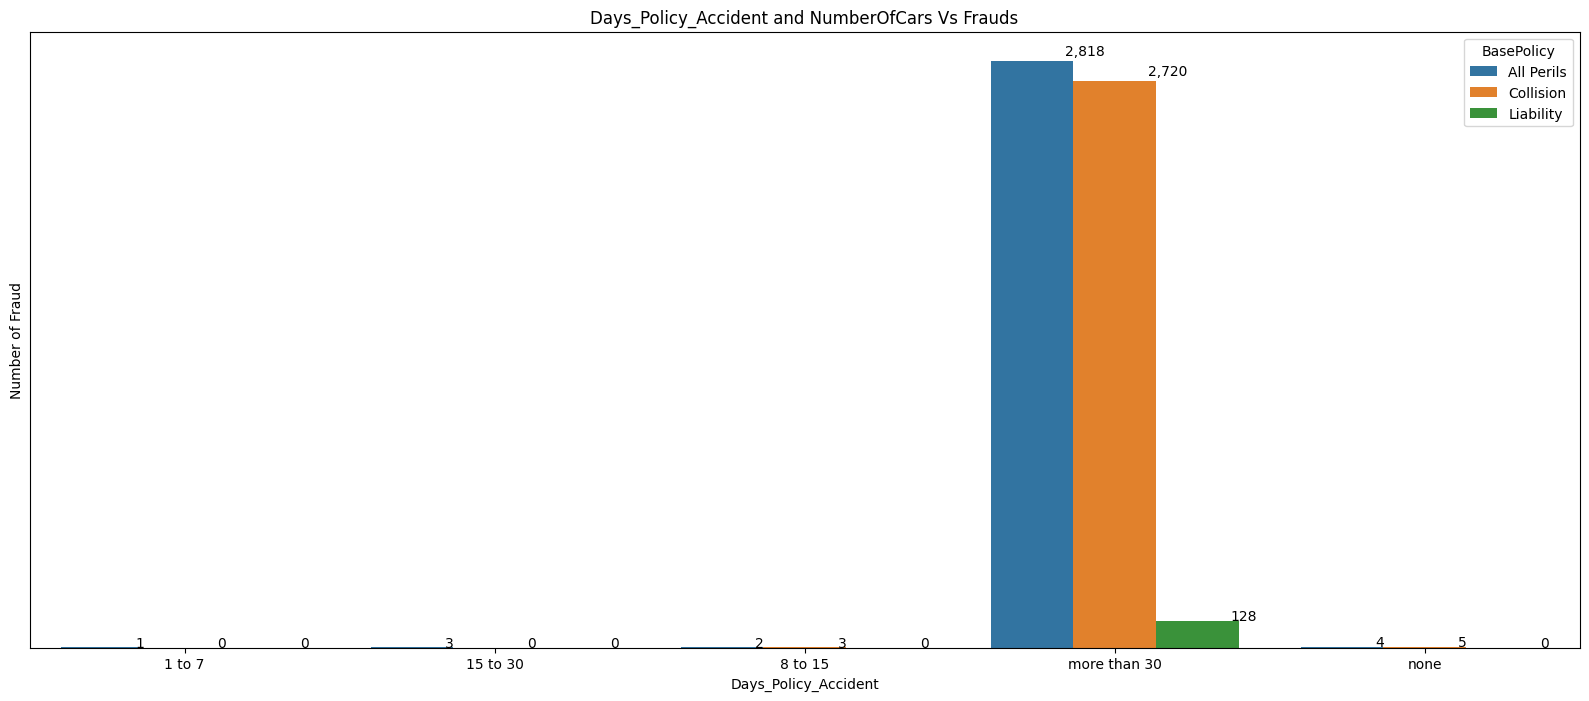

In [28]:
import numpy as np  # Import numpy for NaN handling

# Group the DataFrame and calculate the sum of 'FraudFound_P'
grouped_df = df.groupby(['Days_Policy_Accident', 'BasePolicy'])['FraudFound_P'].sum()
grouped_df = grouped_df.reset_index()

plt.figure(figsize=(20, 8))
plt.title("Days_Policy_Accident and NumberOfCars Vs Frauds")

# Create the bar plot
ax = sns.barplot(x='Days_Policy_Accident', y='FraudFound_P', hue='BasePolicy', data=grouped_df)

# Annotate each bar with its value (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    # Check if the height value is NaN
    if not np.isnan(height):
        ax.annotate(str(format(int(height), ',')), (p.get_x() + 0.24, height * 1.01))

plt.xlabel("Days_Policy_Accident")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()
